In [2]:
import pandas as pd
import numpy as np

In [3]:
column  = ['clicks', 'impressions', 'AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId']
train   = pd.read_csv('../Data/training.txt', sep='\t', header=None, names=column,nrows = 5000000)
train.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234
1,0,1,4860571499428580850,21560664,37484,2,2,2255103,317,48989,44771,490234
2,0,1,9704320783495875564,21748480,36759,3,3,4532751,60721,685038,29681,490234
3,0,1,13677630321509009335,3517124,23778,3,1,1601,2155,1207,1422,490234
4,0,1,3284760244799604489,20758093,34535,1,1,4532751,77819,266618,222223,490234


In [4]:
train['CTR'] = train['clicks'] * 1.0 / train['impressions']

train['RPosition'] = train['Depth'] - train['Pos'] * 1.0 / train['Depth']

train['pCTR'] = (1.0 * train['clicks'] + 0.05 * 75) / (train['impressions'] + 75)

train.head()


,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,CTR,RPosition,pCTR
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,576,490234,0.0,2.000000,0.049342
1,0,1,4860571499428580850,21560664,37484,2,2,2255103,317,48989,44771,490234,0.0,1.000000,0.049342
2,0,1,9704320783495875564,21748480,36759,3,3,4532751,60721,685038,29681,490234,0.0,2.000000,0.049342
3,0,1,13677630321509009335,3517124,23778,3,1,1601,2155,1207,1422,490234,0.0,2.666667,0.049342
4,0,1,3284760244799604489,20758093,34535,1,1,4532751,77819,266618,222223,490234,0.0,0.000000,0.049342


In [5]:

train.shape


(5000000, 15)

In [6]:
column  = ['AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId']
test = pd.read_csv('../Data/test.txt', sep='\t', header=None, names=column, nrows = 1000000)

test.head()

,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
0,5325279403472852193,22166806,38756,3,3,6415,34,3341,2080,490234
1,14340390157469404125,3111380,23777,3,1,6415,8872,62423,56167,490234
2,16772851793638846604,22111129,38584,3,2,6415,8872,454986,378040,490234
3,5325279403472852193,22166807,38756,2,1,83,34,5360,2080,490234
4,12057878999086460853,20180629,27961,2,2,83,34,328,455,490234


In [7]:

test.shape


(1000000, 10)

In [9]:
solution = pd.read_csv('../Data/KDD_Track2_solution.csv',  nrows=1000000)
solution.rename(columns = {'I clicks':'clicks'}, inplace = True)
solution = solution[['clicks', 'impressions']].copy()
solution.head()

,clicks,impressions
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:

solution.shape


(1000000, 2)

In [11]:
test = pd.concat([solution, test], axis=1)
test.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,2080,490234
1,0,1,14340390157469404125,3111380,23777,3,1,6415,8872,62423,56167,490234
2,0,1,16772851793638846604,22111129,38584,3,2,6415,8872,454986,378040,490234
3,0,1,5325279403472852193,22166807,38756,2,1,83,34,5360,2080,490234
4,0,1,12057878999086460853,20180629,27961,2,2,83,34,328,455,490234


In [12]:
test['CTR'] = test['clicks'] * 1.0 / test['impressions']
test['RPosition'] = test['Depth'] - test['Pos'] * 1.0 / test['Depth']

test['pCTR'] = (1.0 * test['clicks'] + 0.05 * 75) / (test['impressions'] + 75)

test.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId,CTR,RPosition,pCTR
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,2080,490234,0.0,2.000000,0.049342
1,0,1,14340390157469404125,3111380,23777,3,1,6415,8872,62423,56167,490234,0.0,2.666667,0.049342
2,0,1,16772851793638846604,22111129,38584,3,2,6415,8872,454986,378040,490234,0.0,2.333333,0.049342
3,0,1,5325279403472852193,22166807,38756,2,1,83,34,5360,2080,490234,0.0,1.500000,0.049342
4,0,1,12057878999086460853,20180629,27961,2,2,83,34,328,455,490234,0.0,1.000000,0.049342


In [13]:

test.shape


(1000000, 15)

In [14]:

def count(sentence):
    '''
        (str) -> (int)
        Returns no. of words in a sentence.
    '''
    return len(str(sentence).split('|'))


In [16]:


# Load User Data..

user_col  = ['UId', 'Gender', 'Age']
user      = pd.read_csv('../Data/userid_profile.txt', sep='\t', header=None, names=user_col)

# Load Query Data..

query_col = ['QId', 'Query']
query     = pd.read_csv('../Data/queryid_tokensid.txt', sep='\t', header=None, names=query_col)

# Load Ad Description Data..

desc_col  = ['DescId', 'Description']
desc      = pd.read_csv('../Data/descriptionid_tokensid.txt', sep='\t', header=None, names=desc_col)

# Load Ad Title Data..

title_col = ['TitleId', 'Title']
title     = pd.read_csv('../Data/titleid_tokensid.txt', sep='\t', header=None, names=title_col)

# Load Keyword Data..

key_col  = ['KeyId', 'Keyword']
keyword  = pd.read_csv('../Data/purchasedkeywordid_tokensid.txt', sep='\t', header=None, names=key_col)

# Count no. of tokens in a query issued by a user.

query['QCount'] = query['Query'].apply(count)
del query['Query']

# Count no. of tokens in title of an advertisement.

title['TCount'] = title['Title'].apply(count)
del title['Title']

# Count no. of tokens in description of an advertisement.

desc['DCount'] = desc['Description'].apply(count)
del desc['Description']

# Count no. of tokens in purchased keyword.

keyword['KCount'] = keyword['Keyword'].apply(count)
del keyword['Keyword']



In [17]:
train = pd.merge(train, user,  on='UId')
train = pd.merge(train, query, on='QId')
train = pd.merge(train, title, on='TitleId')
train = pd.merge(train, desc,  on='DescId')
train = pd.merge(train, keyword, on='KeyId')

train.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,UId,CTR,RPosition,pCTR,Gender,Age,QCount,TCount,DCount,KCount
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,490234,0.0,2.0,0.049342,1,3,1,8,21,3
1,0,2,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,30161,0.0,1.0,0.048701,1,3,1,8,21,3
2,0,1,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,1873171,0.0,1.0,0.049342,2,5,1,8,21,3
3,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,6558374,0.0,2.0,0.049342,0,2,1,8,21,3
4,0,2,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,1566180,0.0,2.0,0.048701,2,5,1,8,21,3


In [18]:
test = pd.merge(test, user,  on='UId')
test = pd.merge(test, query, on='QId')
test = pd.merge(test, title, on='TitleId')
test = pd.merge(test, desc,  on='DescId')
test = pd.merge(test, keyword, on='KeyId')

test.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,UId,CTR,RPosition,pCTR,Gender,Age,QCount,TCount,DCount,KCount
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,...,490234,0.0,2.0,0.049342,1,3,1,14,26,1
1,0,1,5325279403472852193,22166806,38756,3,3,4902,34,3341,...,15900,0.0,2.0,0.049342,1,5,2,14,26,1
2,0,1,5325279403472852193,22166806,38756,2,2,308,34,3341,...,302714,0.0,1.0,0.049342,2,3,2,14,26,1
3,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,2235546,0.0,2.0,0.049342,1,3,2,14,26,1
4,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,111500,0.0,2.0,0.049342,1,4,2,14,26,1


In [26]:
train_avg_ctr = {}
train_avg_pctr = {}

def add(dataset, key, label, col, op):
    
    temp = dataset
    
    result = temp.groupby(key).agg([op])
    index  = result.index
    ctr    = np.asarray(result)
    
    temp = pd.DataFrame()
    temp[key] = index
    temp[label] = ctr
    if col=='CTR':
        train_avg_ctr[label]=np.mean(ctr)
    elif col == 'pCTR':
        train_avg_pctr[label]=np.mean(ctr)
        
    return temp


def addfeatures(dataset, train, keys, labels, col, op):

    for key in keys:
        temp = train[[key, col]]
        temp = add(temp, key, labels[key], col, op)
        dataset = pd.merge(dataset, temp, on=key, how='left')
    
    return dataset
    


In [27]:
keys = ['AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId', 'Gender', 'Age','RPosition']
labels = {'AdURL':'mAdURL', 'AdId':'mAdCTR', 'AdvId':'mAdvCTR', 'Depth':'mDepthCTR', 'Pos':'mPosCTR', 'QId':'mQId', 
          'KeyId':'mKeyId', 'TitleId':'mTitleId', 'DescId':'mDescId', 'UId':'mUId', 'Gender': 'mGender', 'Age':'mAge','RPosition':'mRPosition'}

train_updated = addfeatures(train,train, keys, labels, 'CTR', 'mean')
train_updated.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,mDepthCTR,mPosCTR,mQId,mKeyId,mTitleId,mDescId,mUId,mGender,mAge,mRPosition
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.035616,0.018944,0.040284,0.025974,0.024,0.038875,0.000000,0.044093,0.043846,0.018944
1,0,2,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,0.047993,0.030773,0.040284,0.025974,0.024,0.038875,0.007246,0.044093,0.043846,0.031384
2,0,1,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,0.047993,0.030773,0.040284,0.025974,0.024,0.038875,0.000000,0.045860,0.047465,0.031384
3,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.035616,0.018944,0.040284,0.025974,0.024,0.038875,0.000000,0.045276,0.045257,0.018944
4,0,2,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.035616,0.018944,0.040284,0.025974,0.024,0.038875,0.130952,0.045860,0.047465,0.018944


In [28]:
test_updated = addfeatures(test,train, keys, labels, 'CTR', 'mean')

test_updated.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,mDepthCTR,mPosCTR,mQId,mKeyId,mTitleId,mDescId,mUId,mGender,mAge,mRPosition
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,...,0.035616,0.018944,0.000000,0.031357,0.0,0.05,0.000000,0.044093,0.043846,0.018944
1,0,1,5325279403472852193,22166806,38756,3,3,4902,34,3341,...,0.035616,0.018944,0.075758,0.031357,0.0,0.05,0.007576,0.044093,0.047465,0.018944
2,0,1,5325279403472852193,22166806,38756,2,2,308,34,3341,...,0.047993,0.030773,0.080735,0.031357,0.0,0.05,0.304348,0.045860,0.043846,0.031384
3,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.035616,0.018944,0.080735,0.031357,0.0,0.05,NaN,0.044093,0.043846,0.018944
4,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.035616,0.018944,0.080735,0.031357,0.0,0.05,NaN,0.044093,0.042321,0.018944


In [29]:
test_updated.isnull().sum()

clicks              0
impressions         0
AdURL               0
AdId                0
AdvId               0
Depth               0
Pos                 0
QId                 0
KeyId               0
TitleId             0
DescId              0
UId                 0
CTR                 0
RPosition           0
pCTR                0
Gender              0
Age                 0
QCount              0
TCount              0
DCount              0
KCount              0
mAdURL          32900
mAdCTR          87306
mAdvCTR         28914
mDepthCTR           0
mPosCTR             0
mQId           355645
mKeyId          48754
mTitleId       210667
mDescId        172196
mUId           629664
mGender             0
mAge                0
mRPosition          0
dtype: int64

In [31]:
train_avg_ctr

{'mAdURL': 0.042683532974941985,
 'mAdCTR': 0.05013193560876735,
 'mAdvCTR': 0.039449742909037376,
 'mDepthCTR': 0.04312930130335679,
 'mPosCTR': 0.03496579003084268,
 'mQId': 0.03870393789270089,
 'mKeyId': 0.059187933569904386,
 'mTitleId': 0.0527227126355866,
 'mDescId': 0.05088111547947272,
 'mUId': 0.052807104386749654,
 'mGender': 0.04507620832251108,
 'mAge': 0.046004634698141485,
 'mRPosition': 0.04154847895253962}

In [32]:
test_updated = test_updated.fillna(value=train_avg_ctr)

In [33]:
test_updated.isnull().sum()

clicks         0
impressions    0
AdURL          0
AdId           0
AdvId          0
Depth          0
Pos            0
QId            0
KeyId          0
TitleId        0
DescId         0
UId            0
CTR            0
RPosition      0
pCTR           0
Gender         0
Age            0
QCount         0
TCount         0
DCount         0
KCount         0
mAdURL         0
mAdCTR         0
mAdvCTR        0
mDepthCTR      0
mPosCTR        0
mQId           0
mKeyId         0
mTitleId       0
mDescId        0
mUId           0
mGender        0
mAge           0
mRPosition     0
dtype: int64

In [34]:
keys = ['AdURL', 'AdId', 'AdvId', 'Depth', 'Pos', 'QId', 'KeyId', 'TitleId', 'DescId', 'UId', 'Gender', 'Age','RPosition']
labels = {'AdURL':'pAdURL', 'AdId':'pAdCTR', 'AdvId':'pAdvCTR', 'Depth':'pDepthCTR', 'Pos':'pPosCTR', 'QId':'pQId', 
          'KeyId':'pKeyId', 'TitleId':'pTitleId', 'DescId':'pDescId', 'UId':'pUId', 'Gender': 'pGender', 'Age':'pAge','RPosition':'pRPosition'}

train_updated = addfeatures(train_updated,train, keys, labels, 'pCTR', 'mean')
train_updated.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,pDepthCTR,pPosCTR,pQId,pKeyId,pTitleId,pDescId,pUId,pGender,pAge,pRPosition
0,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.049733,0.049501,0.049798,0.049585,0.049546,0.049729,0.049342,0.049856,0.049863,0.049501
1,0,2,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,0.049929,0.049677,0.049798,0.049585,0.049546,0.049729,0.049368,0.049856,0.049863,0.049689
2,0,1,4298118681424644510,7686695,385,2,2,1601,5521,7709,...,0.049929,0.049677,0.049798,0.049585,0.049546,0.049729,0.049289,0.049904,0.049916,0.049689
3,0,1,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.049733,0.049501,0.049798,0.049585,0.049546,0.049729,0.049342,0.049889,0.049889,0.049501
4,0,2,4298118681424644510,7686695,385,3,3,1601,5521,7709,...,0.049733,0.049501,0.049798,0.049585,0.049546,0.049729,0.051716,0.049904,0.049916,0.049501


In [35]:
train_updated.isnull().sum()

clicks         0
impressions    0
AdURL          0
AdId           0
AdvId          0
Depth          0
Pos            0
QId            0
KeyId          0
TitleId        0
DescId         0
UId            0
CTR            0
RPosition      0
pCTR           0
Gender         0
Age            0
QCount         0
TCount         0
DCount         0
KCount         0
mAdURL         0
mAdCTR         0
mAdvCTR        0
mDepthCTR      0
mPosCTR        0
mQId           0
mKeyId         0
mTitleId       0
mDescId        0
mUId           0
mGender        0
mAge           0
mRPosition     0
pAdURL         0
pAdCTR         0
pAdvCTR        0
pDepthCTR      0
pPosCTR        0
pQId           0
pKeyId         0
pTitleId       0
pDescId        0
pUId           0
pGender        0
pAge           0
pRPosition     0
dtype: int64

In [36]:
train_avg_pctr

{'pAdURL': 0.049837782154930656,
 'pAdCTR': 0.04995451552803654,
 'pAdvCTR': 0.049786830606215984,
 'pDepthCTR': 0.049849564136883684,
 'pPosCTR': 0.04973412521783558,
 'pQId': 0.04980927172756563,
 'pKeyId': 0.0500856992372525,
 'pTitleId': 0.0499927604186036,
 'pDescId': 0.0499635537426502,
 'pUId': 0.05001262762031949,
 'pGender': 0.049883050216235535,
 'pAge': 0.04989394713035658,
 'pRPosition': 0.04982557062215825}

In [37]:
test_updated = addfeatures(test_updated,train, keys, labels, 'pCTR', 'mean')
test_updated.head()

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,pDepthCTR,pPosCTR,pQId,pKeyId,pTitleId,pDescId,pUId,pGender,pAge,pRPosition
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,...,0.049733,0.049501,0.049330,0.049707,0.048397,0.049889,0.049342,0.049856,0.049863,0.049501
1,0,1,5325279403472852193,22166806,38756,3,3,4902,34,3341,...,0.049733,0.049501,0.050271,0.049707,0.048397,0.049889,0.049342,0.049856,0.049916,0.049501
2,0,1,5325279403472852193,22166806,38756,2,2,308,34,3341,...,0.049929,0.049677,0.050383,0.049707,0.048397,0.049889,0.053263,0.049904,0.049863,0.049689
3,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.049733,0.049501,0.050383,0.049707,0.048397,0.049889,NaN,0.049856,0.049863,0.049501
4,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.049733,0.049501,0.050383,0.049707,0.048397,0.049889,NaN,0.049856,0.049835,0.049501


In [50]:
train_updated.isnull().sum()

clicks         0
impressions    0
AdURL          0
AdId           0
AdvId          0
Depth          0
Pos            0
QId            0
KeyId          0
TitleId        0
DescId         0
UId            0
CTR            0
RPosition      0
pCTR           0
Gender         0
Age            0
QCount         0
TCount         0
DCount         0
KCount         0
mAdURL         0
mAdCTR         0
mAdvCTR        0
mDepthCTR      0
mPosCTR        0
mQId           0
mKeyId         0
mTitleId       0
mDescId        0
mUId           0
mGender        0
mAge           0
mRPosition     0
pAdURL         0
pAdCTR         0
pAdvCTR        0
pDepthCTR      0
pPosCTR        0
pQId           0
pKeyId         0
pTitleId       0
pDescId        0
pUId           0
pGender        0
pAge           0
pRPosition     0
dtype: int64

In [52]:
test_updated = test_updated.fillna(value=train_avg_pctr)
test_updated

,clicks,impressions,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,...,pDepthCTR,pPosCTR,pQId,pKeyId,pTitleId,pDescId,pUId,pGender,pAge,pRPosition
0,0,1,5325279403472852193,22166806,38756,3,3,6415,34,3341,...,0.049733,0.049501,0.049330,0.049707,0.048397,0.049889,0.049342,0.049856,0.049863,0.049501
1,0,1,5325279403472852193,22166806,38756,3,3,4902,34,3341,...,0.049733,0.049501,0.050271,0.049707,0.048397,0.049889,0.049342,0.049856,0.049916,0.049501
2,0,1,5325279403472852193,22166806,38756,2,2,308,34,3341,...,0.049929,0.049677,0.050383,0.049707,0.048397,0.049889,0.053263,0.049904,0.049863,0.049689
3,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.049733,0.049501,0.050383,0.049707,0.048397,0.049889,0.050013,0.049856,0.049863,0.049501
4,0,1,5325279403472852193,22166806,38756,3,3,308,34,3341,...,0.049733,0.049501,0.050383,0.049707,0.048397,0.049889,0.050013,0.049856,0.049835,0.049501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995566,0,2,18138324382403897652,20719124,8612,3,3,2695440,121154,480884,...,0.049733,0.049501,0.049809,0.050086,0.049993,0.049964,0.050013,0.049856,0.049835,0.049501
995567,0,1,18138324382403897652,20719124,8612,3,2,388736,121154,480884,...,0.049733,0.049677,0.049809,0.050086,0.049993,0.049964,0.050013,0.049856,0.049835,0.049631
995568,0,1,18138324382403897652,20719124,8612,3,1,388736,121154,480884,...,0.049733,0.050025,0.049809,0.050086,0.049993,0.049964,0.050013,0.049856,0.049835,0.050073
995569,1,1,999105727583572092,20345786,30428,3,2,1241794,384092,2977164,...,0.049733,0.049677,0.049809,0.050086,0.049993,0.049964,0.050013,0.049856,0.049835,0.049631


In [53]:
train_updated.to_csv('../Data/train_5M_regr.csv',index=False)
test_updated.to_csv('../Data/test_1M_regr.csv',index=False)

In [40]:
train_x = train_updated[['pAdURL','pAdCTR', 'pAdvCTR','pPosCTR','pQId', 
          'pKeyId', 'pTitleId', 'pDescId','pUId','pGender','pAge','pRPosition']].copy()

train_y = train_updated[['CTR']].copy()

In [41]:
test_x = test_updated[['pAdURL','pAdCTR', 'pAdvCTR','pPosCTR','pQId', 
          'pKeyId', 'pTitleId', 'pDescId','pUId','pGender','pAge','pRPosition']].copy()

test_y = test_updated[['CTR']].copy()

In [42]:
def scoreClickAUC(num_clicks, num_impressions, predicted_ctr):
    """
    Calculates the area under the ROC curve (AUC) for click rates

    Parameters
    ----------
    num_clicks : a list containing the number of clicks

    num_impressions : a list containing the number of impressions

    predicted_ctr : a list containing the predicted click-through rates

    Returns
    ------- a under the ROC curve (AUC) for click rates
    """
     #sorting the values in descending order and store the index
    i_sorted = sorted(range(len(predicted_ctr)),key=lambda i: predicted_ctr[i],
                      reverse=True)
    auc_temp = 0.0
    click_sum = 0.0
    old_click_sum = 0.0
    no_click = 0.0
    no_click_sum = 0.0

    # treat all instances with the same predicted_ctr as coming from the same bucket
    last_ctr = predicted_ctr[i_sorted[0]] + 1.0

    for i in range(len(predicted_ctr)):
        # when prev_ctr value at i-1 not match with current ctr value at i
        if last_ctr != predicted_ctr[i_sorted[i]]: 
            auc_temp += (click_sum+old_click_sum) * no_click / 2.0        
            old_click_sum = click_sum
            no_click = 0.0
            last_ctr = predicted_ctr[i_sorted[i]] #updating the last ctr value 
        # Calculating negative sample as #impressions - #clicks    
        no_click += num_impressions[i_sorted[i]] - num_clicks[i_sorted[i]]
        no_click_sum += num_impressions[i_sorted[i]] - num_clicks[i_sorted[i]]
        # Calculating postive samples as # of clicks 
        click_sum += num_clicks[i_sorted[i]]
    auc_temp += (click_sum+old_click_sum) * no_click / 2.0
    auc = auc_temp / (click_sum * no_click_sum) # That is the scaling to a total area of 1
    return auc

In [43]:

def mean_absolute_percentage_error(y_true, y_pred): 
    """
    return: MAPE 
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [44]:
import pickle
import xgboost as xgb
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
# depth of tree
for i in [2,4]:
    # number of estimators
    for j in [500,800,1000]:
    
        regr = xgb.XGBRegressor(max_depth= i, min_samples_split= 2,learning_rate=0.01,n_estimators = j, verbose=1)
        regr.fit(train_x, train_y)
        y_pred_test = regr.predict(test_x)
        y_pred_train = regr.predict(train_x)
        print('-'*50)
 
        roc_auc = scoreClickAUC(train['clicks'],train['impressions'],y_pred_train)
        err = mean_absolute_error(y_pred_train, train_y)
        print("the train auc with depth = ",i," and with esimators = ",j," is ", roc_auc)
        print("Train_MAPE", err * 100)

        roc_auc = scoreClickAUC(test['clicks'],test['impressions'],y_pred_test)
        err = mean_absolute_error(y_pred_test, test_y)
        print("the test auc with depth = ",i," and with esimators = ",j," is ", roc_auc)
        print("Test_MAPE",err * 100)

[10:22:42] WARNING: /usr/local/miniconda/conda-bld/xgboost_1584539872846/work/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
--------------------------------------------------
the train auc with depth =  2  and with esimators =  500  is  0.9739797906220012
Train_MAPE 4.964510670531867
the test auc with depth =  2  and with esimators =  500  is  0.6795894544954032
Test_MAPE 7.223604131071723
[10:38:38] WARNING: /usr/local/miniconda/conda-bld/xgboost_1584539872846/work/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
--------------------------------------------------
the train auc with depth =  2  and with esimators =  800  is  0.9748695555405679
Train_MAPE 4.889841906030833
the test auc with depth =  2  and with esi

In [45]:
import matplotlib.pyplot as plt
import numpy as np
regr = xgb.XGBRegressor(max_depth= 2, min_samples_split= 2,learning_rate=0.01,n_estimators = 800 , verbose=1)
regr.fit(train_x, train_y)
y_pred_test = regr.predict(test_x)
y_pred_train = regr.predict(train_x)
print('-'*50)


[12:47:32] WARNING: /usr/local/miniconda/conda-bld/xgboost_1584539872846/work/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
--------------------------------------------------


In [46]:
roc_auc = scoreClickAUC(test['clicks'],test['impressions'],y_pred_test)
print(roc_auc)

0.6806297650368802


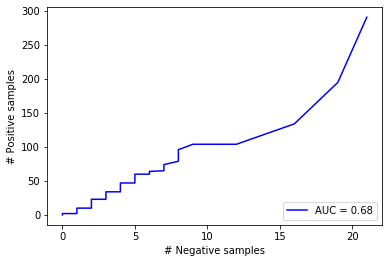

In [47]:

import matplotlib.pyplot as plt
#plt.title('Receiver Operating Characteristic')
tpr = test['clicks']
fpr = test['impressions'] - test['clicks']
tpr = tpr.sort_values()
fpr = fpr.sort_values()

plt.plot(tpr, fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('# Positive samples')
plt.xlabel('# Negative samples')
plt.show() 

In [48]:
from matplotlib import pyplot
# feature importance
print(regr.feature_importances_)


[0.00217973 0.         0.00419674 0.04388202 0.27863124 0.00521936
 0.29689655 0.01751441 0.34470233 0.         0.         0.00677765]


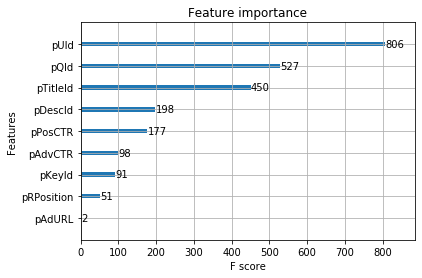

In [49]:
from xgboost import plot_importance
plot_importance(regr)
pyplot.show()
